Notes from singh: Standardize features for coefs that are small in lasso and ridge

# RSNA Screening Mammography Breast Cancer Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer = pd.read_csv("C:/Users/valde/Downloads/train.csv/train.csv")
cancer.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


# Feature engineering

In [4]:
cancer.shape

(54706, 14)

Show %

In [5]:
cancer.isna().sum() / len(cancer) * 100

site_id                     0.000000
patient_id                  0.000000
image_id                    0.000000
laterality                  0.000000
view                        0.000000
age                         0.067634
cancer                      0.000000
biopsy                      0.000000
invasive                    0.000000
BIRADS                     51.950426
implant                     0.000000
density                    46.130223
machine_id                  0.000000
difficult_negative_case     0.000000
dtype: float64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
cancer['age'] = imputer.fit_transform(cancer[['age']])

In [7]:
#More than 10% missing 
cancer = cancer.drop(['BIRADS', 'density', 'site_id', 'patient_id', 'image_id', 'machine_id'], axis=1)

In [8]:
cancer['difficult_negative_case'].unique()

array([False,  True])

In [9]:
#changing true false values in difficult negative case to 0 for false and true for 1
cancer['difficult_negative_case'] = cancer['difficult_negative_case'].astype(int)

In [10]:
cancer.head()

,laterality,view,age,cancer,biopsy,invasive,implant,difficult_negative_case
0,L,CC,61.0,0,0,0,0,0
1,L,MLO,61.0,0,0,0,0,0
2,R,MLO,61.0,0,0,0,0,0
3,R,CC,61.0,0,0,0,0,0
4,L,CC,55.0,0,0,0,0,1


In [11]:
cancer.isna().sum()

laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
implant                    0
difficult_negative_case    0
dtype: int64

Must do one hot encoding to transform features to make them more useful, bar plotwith biopsy maybe one hot encoding, should have high recall

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, dtype=np.int64)

In [13]:
one_hot_encoded = encoder.fit_transform(cancer[['laterality', 'view']])

In [14]:
df_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(['laterality', 'view']))

C:\Users\valde\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df_encoded.head()

,laterality_L,laterality_R,view_AT,view_CC,view_LM,view_LMO,view_ML,view_MLO
0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0


In [16]:
cancer_encoded = pd.concat([cancer, df_encoded], axis=1)
cancer_encoded = cancer_encoded.drop(labels=['laterality', 'view'], axis=1)
cancer_encoded.head()

,age,cancer,biopsy,invasive,implant,difficult_negative_case,laterality_L,laterality_R,view_AT,view_CC,view_LM,view_LMO,view_ML,view_MLO
0,61.0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,61.0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,61.0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,61.0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,55.0,0,0,0,0,1,1,0,0,1,0,0,0,0


# Visualization of our features and their relationship with our response variable

The majority of the data is in our negative class. The data we want to predict on which is our positive class is very small, this could give us biased results and we'll have to handle this when building our model.

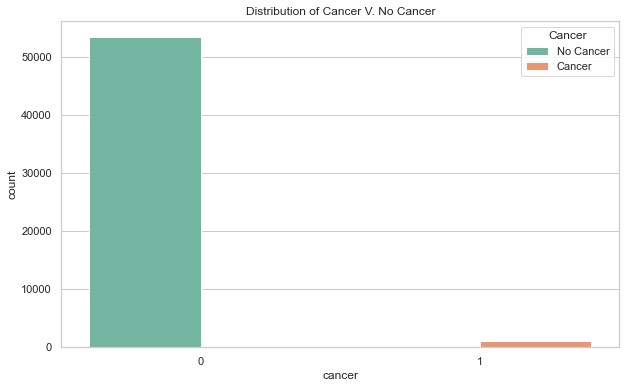

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=cancer_encoded, x='cancer', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer V. No Cancer')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

### Interesting feature: all of the cancer positive class lies in those who have had a biopsy screening follow up after the original screening.

Use Boxplot

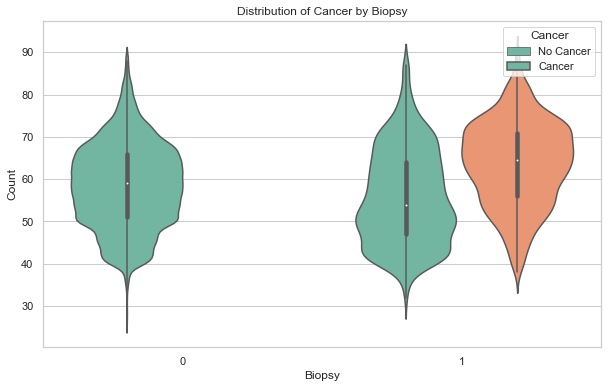

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='biopsy', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by Biopsy')
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

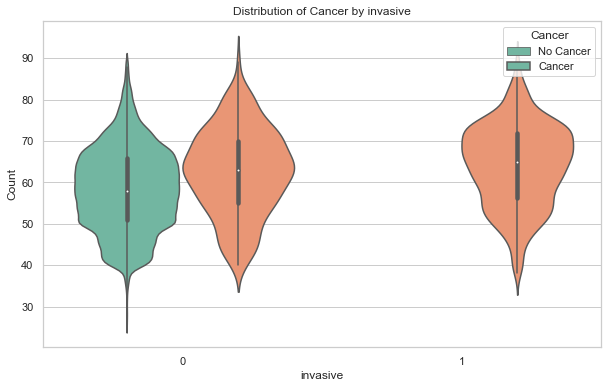

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='invasive', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by invasive')
plt.xlabel('invasive')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

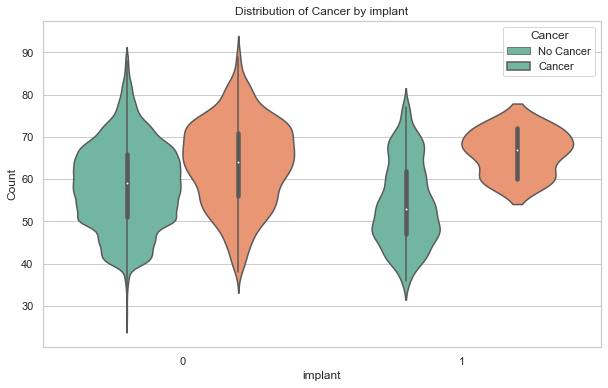

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='implant', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by implant')
plt.xlabel('implant')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

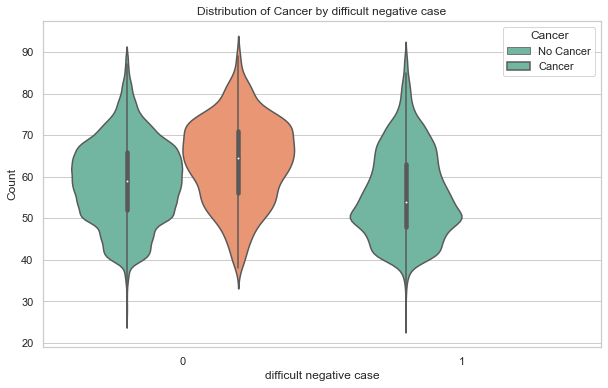

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='difficult_negative_case', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by difficult negative case')
plt.xlabel('difficult negative case')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

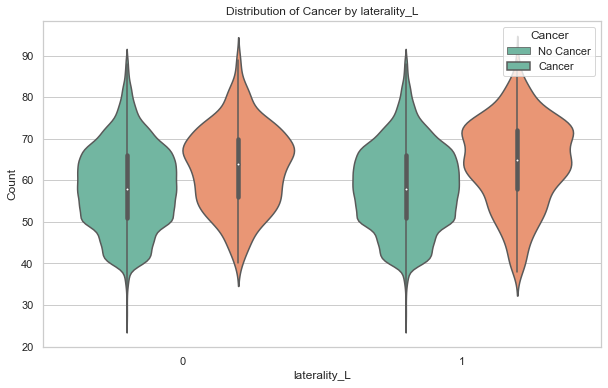

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='laterality_L', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by laterality_L')
plt.xlabel('laterality_L')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

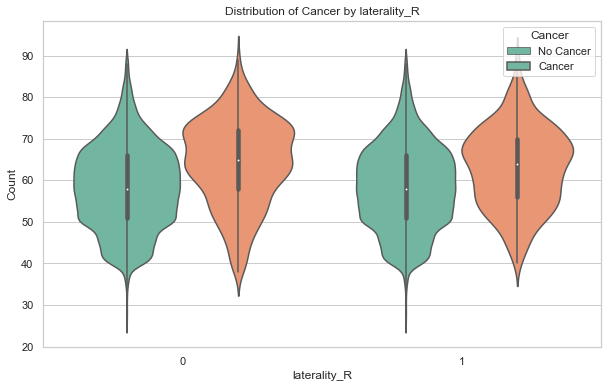

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=cancer_encoded, x='laterality_R', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by laterality_R')
plt.xlabel('laterality_R')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

In [38]:
cancer_encoded.columns

Index(['age', 'cancer', 'biopsy', 'invasive', 'implant',
       'difficult_negative_case', 'laterality_L', 'laterality_R', 'view_AT',
       'view_CC', 'view_LM', 'view_LMO', 'view_ML', 'view_MLO'],
      dtype='object')

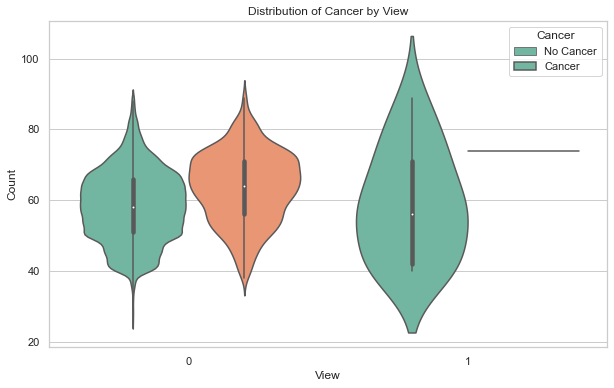

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_AT', y='age', hue='cancer', palette='Set2')

plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

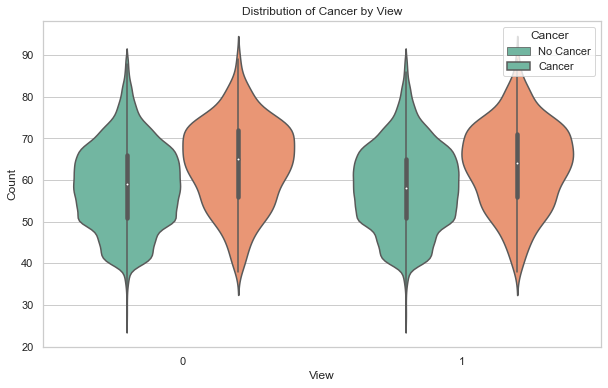

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_CC', y='age', hue='cancer', palette='Set2')
plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

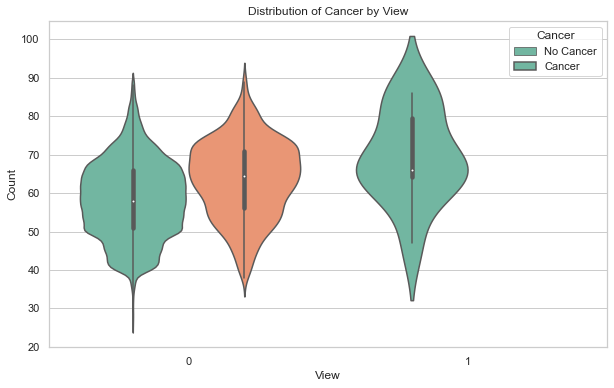

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_LM', y='age', hue='cancer', palette='Set2')

plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

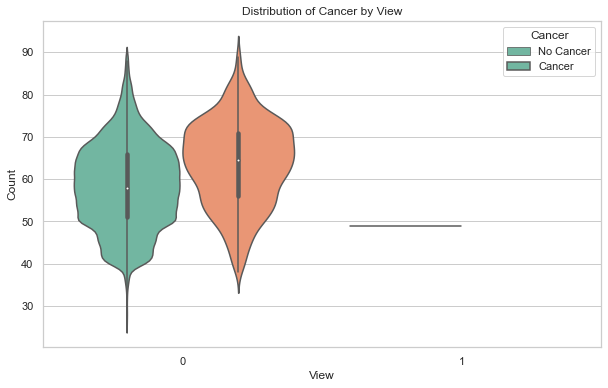

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_LMO', y='age', hue='cancer', palette='Set2')

plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

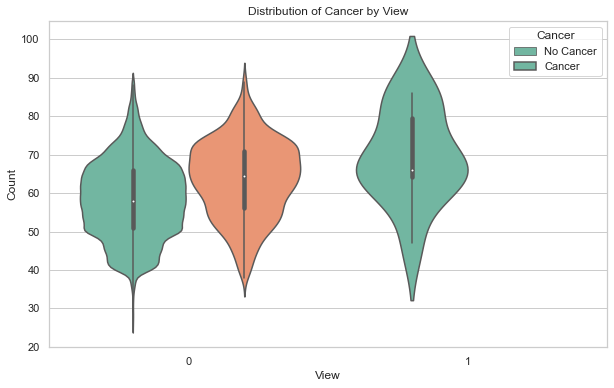

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_LM', y='age', hue='cancer', palette='Set2')

plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

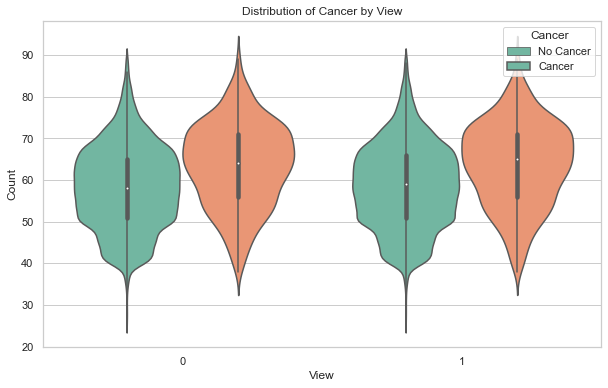

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=cancer_encoded, x='view_MLO', y='age', hue='cancer', palette='Set2')

plt.title('Distribution of Cancer by View')
plt.xlabel('View')
plt.ylabel('Count')
plt.legend(title='Cancer', loc='upper right', labels=['No Cancer', 'Cancer'])
plt.show()

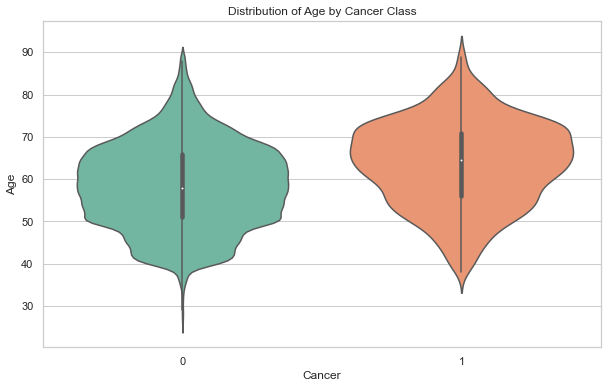

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(x='cancer', y='age', data=cancer_encoded, palette='Set2')

plt.title('Distribution of Age by Cancer Class')
plt.xlabel('Cancer')
plt.ylabel('Age')

plt.show()

Personal note: What seems to be the most interesting features are the ones that have more positive classifications as those can help us predict cancer. Biopsy, age, view of at, lm, lmo, ml, also seem interesting.

# Model Building and Splitting Data

Implement hyperparameter tuning, regularization strength, stochastic gradient descent(SGD classifier), random forest, show clustering.

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cancer_encoded, test_size=0.20, random_state=42)
print("Training Data Size: ", len(train))
print("Test Data Size: ", len(test))

Training Data Size:  43764
Test Data Size:  10942


In [47]:
# On pause for now
from sklearn.linear_model import LogisticRegression

tr_X = train
tr_y = train['cancer']

te_X = test
te_y = test['cancer']

In [48]:
tr_X.shape, tr_y.shape

((43764, 14), (43764,))

In [49]:
te_X.shape, te_y.shape

((10942, 14), (10942,))

Fitting Logistic Regression model to our train data. For X we kept all our columns, we will selectively choose columns based on what we believe to be our best features through ColumnTransformer later on in the process.

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(tr_X, tr_y)

C:\Users\valde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
columnAdder = ColumnTransformer([
    ('keep', 'passthrough', ['biopsy', 'invasive'])
    ])

In [111]:
model0 = Pipeline([
    ('bio+inv', columnAdder),
    ('model0', log_reg)
    ])

In [112]:
model0.fit(train, train['cancer'])

Pipeline(steps=[('bio+inv',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['biopsy', 'invasive'])])),
                ('model0', LogisticRegression())])

In [114]:
pred_y = model0.predict(test)

In [115]:
recall = recall_score(te_y, pred_y, average='weighted')
recall

0.9930542862365198

---

- Using SGDClassifier to predict
- Using recall as my accuracy metric. Measures the value of true positives / total number of actual positives. Important since we dont want to have false negatives as that would run the risk of identifying a patient with no cancer when they actually do have cancer.
- Features we believe highly correlate with cancer
    - Biopsy, difficult negative case, view at, lm, and lmo. This is because all of the positive cases lie for either the negative or positive case, the ones that lie strictly in the + case are biopsy and invasive. 

#### Hyperparameter tuning for alpha in SGDC by using gridsearch

In [53]:
from sklearn.model_selection import GridSearchCV

hype_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

In [59]:
sgdc = SGDClassifier(loss='log', random_state=42)

In [60]:
grid_search = GridSearchCV(sgdc, hype_param_grid, cv=5, scoring='recall')

In [61]:
grid_search.fit(train, train['cancer'])

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000, 1500, 2000]},
             scoring='recall')

In [62]:
best_params = grid_search.best_params_
best_params

{'alpha': 0.0001, 'max_iter': 100}

Will use the above HP values in the actual deployment of model1

____

# SGDClassifier

In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import recall_score

sgdc = SGDClassifier(loss='log', alpha=0.0001, penalty='l1', max_iter=100, random_state=42)
sgdc.fit(tr_X, tr_y)

SGDClassifier(loss='log', max_iter=100, penalty='l1', random_state=42)

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

columnAdder = ColumnTransformer([
    ('keep', 'passthrough', ['biopsy', 'invasive'])
    ])

In [75]:
model1 = Pipeline([
    ('bio+inv', columnAdder),
    ('model1', sgdc)
    ])

In [76]:
model1.fit(train, train['cancer'])

Pipeline(steps=[('bio+inv',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['biopsy', 'invasive'])])),
                ('model1',
                 SGDClassifier(loss='log', max_iter=100, penalty='l1',
                               random_state=42))])

In [77]:
y_pred = model1.predict(test)

In [78]:
recall = recall_score(te_y, y_pred, average='weighted')
recall

0.9930542862365198

___

# Random Forest Classification

#### Hyperparameter tuning for # of trees and bootstrap

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
hype_param_grid = {
    'n_estimators': [25, 50, 75, 100, 150, 200],
    'bootstrap': [True, False]
}

In [275]:
rfc = RandomForestClassifier()

In [276]:
grid_search = GridSearchCV(rfc, hype_param_grid, cv=5, scoring='recall')
grid_search.fit(tr_X, tr_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='recall')

In [277]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True, 'n_estimators': 25}

___

#### Choosing best features

In [279]:
rfc = RandomForestClassifier(n_estimators=25, bootstrap=True, random_state=42)
rfc.fit(tr_X, tr_y)

RandomForestClassifier(n_estimators=25, random_state=42)

In [280]:
feature_importances = rfc.feature_importances_

for feature, importance in zip(tr_X.columns, feature_importances):
    print(f"{feature}: {importance}")

age: 0.003501162570344982
cancer: 0.47344213580115363
biopsy: 0.25072343332640407
invasive: 0.17867013009813687
implant: 0.00015116672874959346
difficult_negative_case: 0.0933243416378862
laterality_L: 5.2650672676022535e-05
laterality_R: 1.8356419610948562e-05
view_AT: 3.89651357142689e-07
view_CC: 2.57440918681334e-05
view_LM: 0.0
view_LMO: 0.0
view_ML: 6.880408888268856e-06
view_MLO: 8.360859292392017e-05


---

#### Deploying model2 and assessing score

In [281]:
columnAdder = ColumnTransformer([
    ('keep', 'passthrough', ['laterality_L', 'view_MLO'])
    ])

In [282]:
model2 = Pipeline([
    ('rf', columnAdder),
    ('model2', rfc)
    ])

In [284]:
model2.fit(train, train['cancer'])

Pipeline(steps=[('rf',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['laterality_L',
                                                   'view_MLO'])])),
                ('model2',
                 RandomForestClassifier(n_estimators=25, random_state=42))])

In [285]:
y_pred = model2.predict(test)

In [286]:
recall = recall_score(te_y, y_pred, average='weighted')
recall

0.9788886857978432

---

The best model performance has been on SGDClassifier with a score of 0.99. This models performance strength is gauged on a scale from 0-1, 1 being the best. With both models we achieved good scores but SGDC is by far the strongest one of our models

---